In [1]:
from pathlib import Path
import sys
from autopilot import prefs
from matplotlib import pyplot as plt
%matplotlib notebook

plax_dir = Path(prefs.get('PLUGINDIR'))
sys.path.append(str(plax_dir))
from parallax import test_kalman
from parallax.tests import utils

In [2]:
pos, vel, accel = test_kalman.sine_data(
    total_time=10, 
    accel_noise=30,
    pos_noise=0.3)

measurements, _, _ = test_kalman.test_kalman_position(pos, accel)

<IPython.core.display.Javascript object>


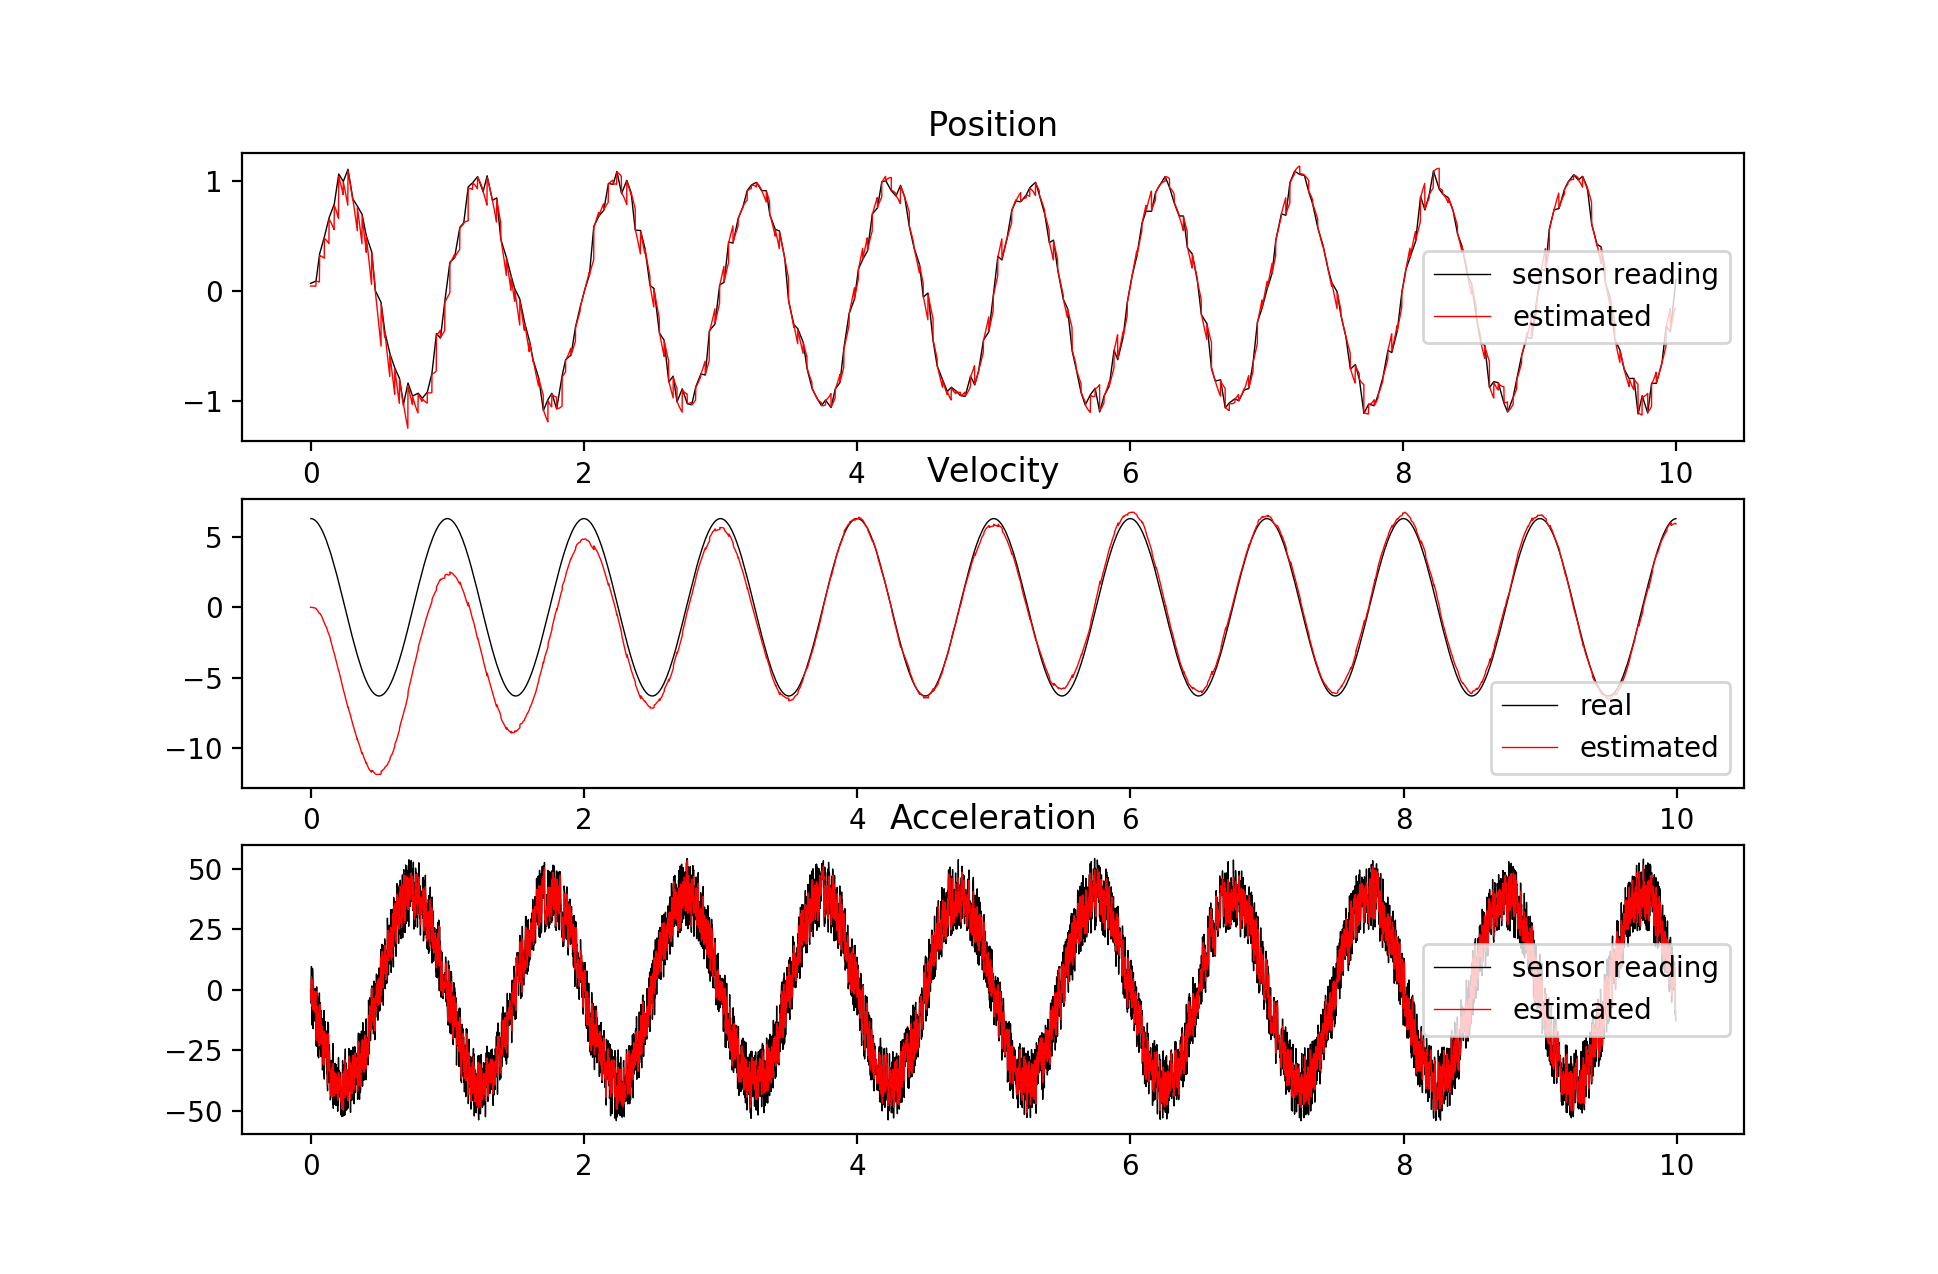

In [3]:
utils.plot_kalman(pos, vel, accel, measurements)

<IPython.core.display.Javascript object>


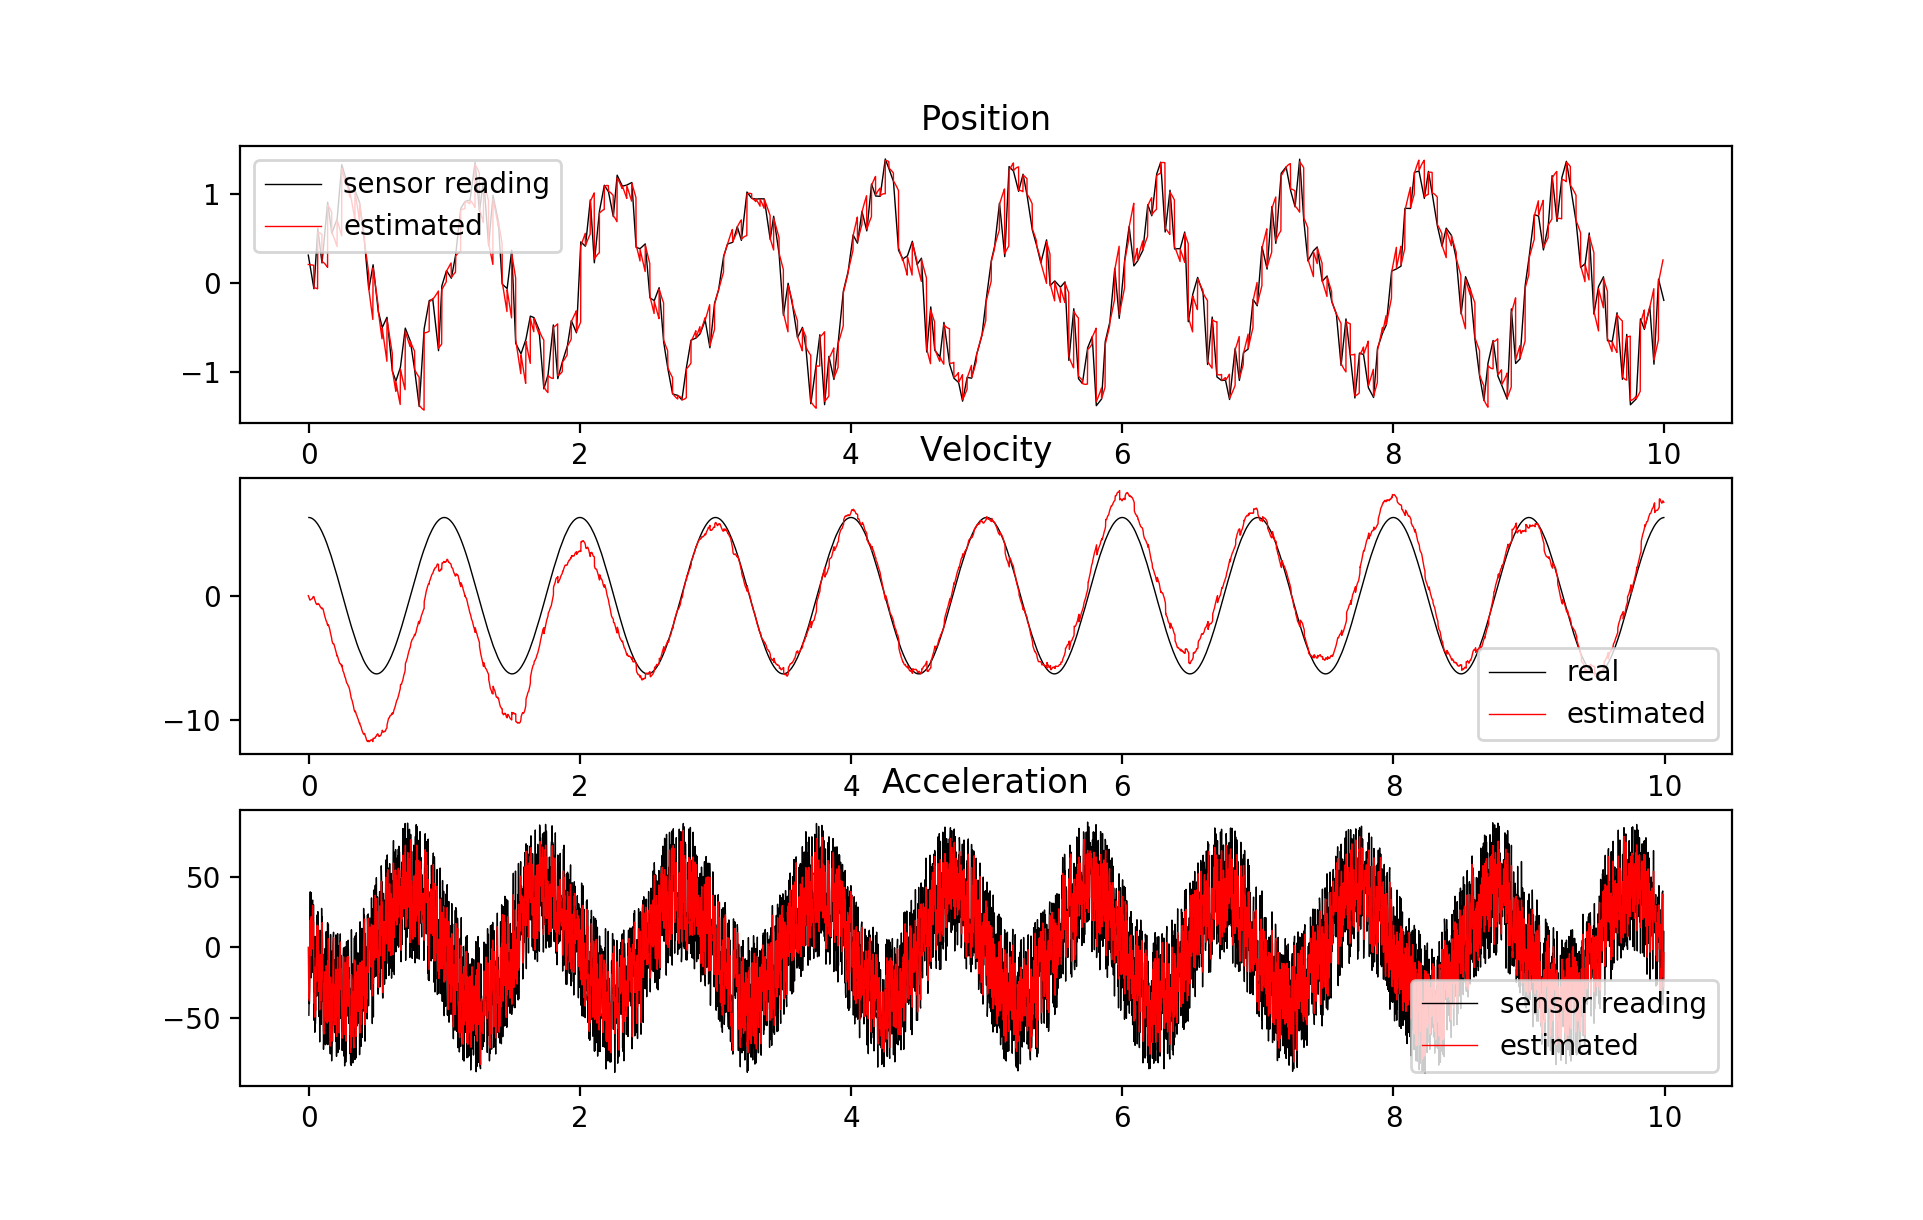

In [4]:
pos, vel, accel = test_kalman.sine_data(
    total_time=10, 
    accel_noise=100,
    pos_noise=1)

measurements, _, _ = test_kalman.test_kalman_position(pos, accel)
utils.plot_kalman(pos, vel, accel, measurements)

<IPython.core.display.Javascript object>


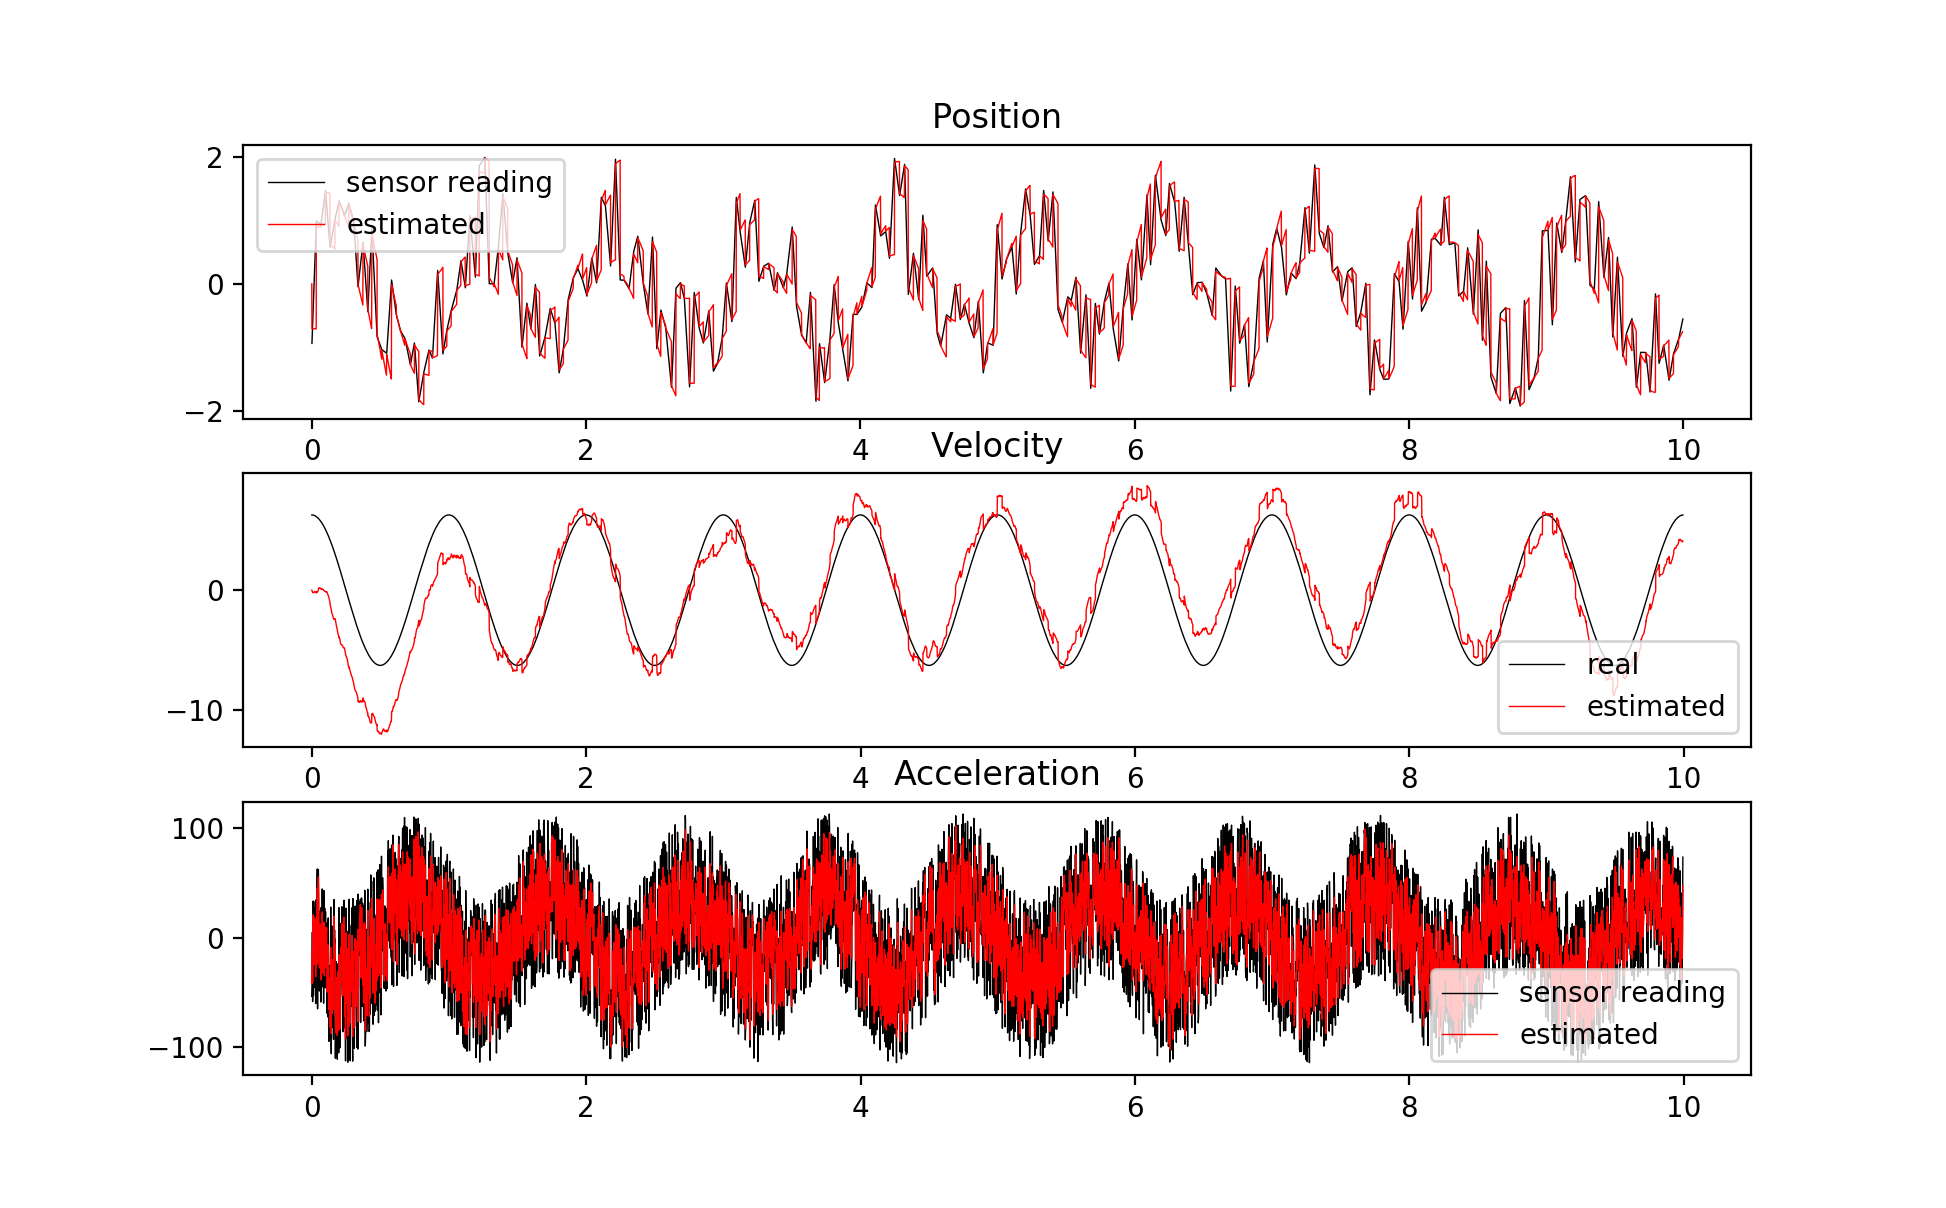

In [5]:
pos, vel, accel = test_kalman.sine_data(
    total_time=10, 
    accel_noise=150,
    pos_noise=2)

measurements, _, _ = test_kalman.test_kalman_position(pos, accel)
utils.plot_kalman(pos, vel, accel, measurements)